# Capstone Project on Heart Disease

it is from an on going cardiovascular study on residents of the town of Framingham The classification goal is to predict whether the patient has 10-years risk of future coronary heart disease (CHD) The dataset provides the patients information: It includes over 4000 records and 15 attributes 

##  Variables

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors

## Demographic

• Sex: male or female  (1:male 0:female) (nominal )

• Age :Age of the patient( continues )

## on basis Behavior:

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes even half a cigarette?)

## Medical (history):

• BP Meds : whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive high blood pressure (Nominal)

• diabetes: whether or not the patient had diabetes (Nominal)

## Medical(current)

• Tot Chol : total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia Bp: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous-in medical research, variables such as heart rate though in fact discrete yet are considered continuous because of large number of possible values)

• Glucose: glucose level (Continuous)

## Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# Importing the libraries

In [1]:

import matplotlib.pyplot as plt


import numpy as np 
import pandas as pd

import seaborn as sns 

from sklearn import metrics

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

In [2]:
# import the data 
df=pd.read_csv('framingham.csv',index_col=False,header=0)

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Checking the sturcture and descriptive stats

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.shape

(4238, 16)

In [7]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
# check for unique values
for i in df.columns: print({i:df[i].unique()})

{'male': array([1, 0], dtype=int64)}
{'age': array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69], dtype=int64)}
{'education': array([ 4.,  2.,  1.,  3., nan])}
{'currentSmoker': array([0, 1], dtype=int64)}
{'cigsPerDay': array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])}
{'BPMeds': array([ 0.,  1., nan])}
{'prevalentStroke': array([0, 1], dtype=int64)}
{'prevalentHyp': array([0, 1], dtype=int64)}
{'diabetes': array([0, 1], dtype=int64)}
{'totChol': array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 

In [9]:
# IT SEEMS EDUCATION HAS NO REALTION WITH HEART DISEASE SO WE DROP IT 
df.drop(["education"],axis=1, inplace=True)

In [10]:
#AS WE CAN SEE THERE IS ALL ATTRIBUTES ARE NUMERICAL.

In [11]:
 #renaming the target variable 
df.rename(columns={'TenYearCHD': 'target'}, inplace=True)

In [12]:
#checking for duplicate values
df.duplicated().sum()

0

In [13]:
#checking for missing values 
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64

# Catergorical Visualization(EDA)

In [14]:
df['male'].value_counts()

0    2419
1    1819
Name: male, dtype: int64

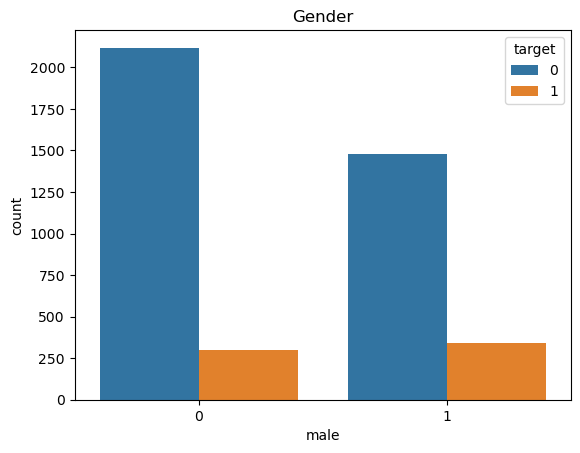

In [15]:
plt.figure()
plt.title('Gender')
sns.countplot(x='male',data=df, hue="target")
plt.show()

In [16]:
df['currentSmoker'].value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

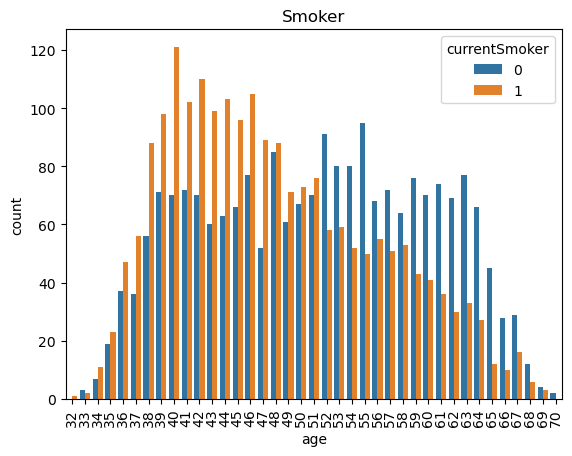

In [17]:
plt.figure()
plt.title('Smoker')
sns.countplot(x='age', data=df,hue='currentSmoker') 
plt.xticks(rotation=90)
plt.show()

In [18]:
df[ 'BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

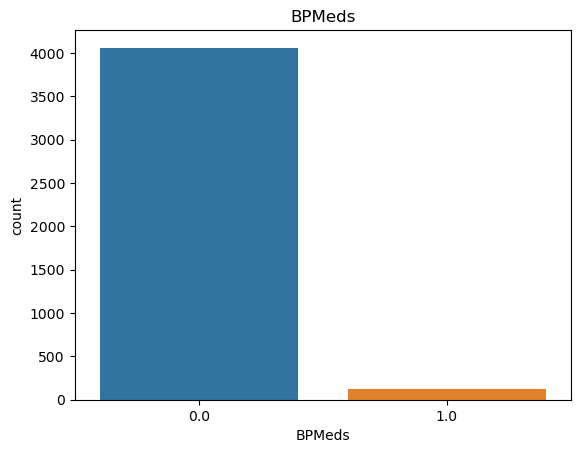

In [19]:
plt.figure()
plt.title('BPMeds')
sns.countplot(x='BPMeds', data=df)
plt.show()

In [20]:
df['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

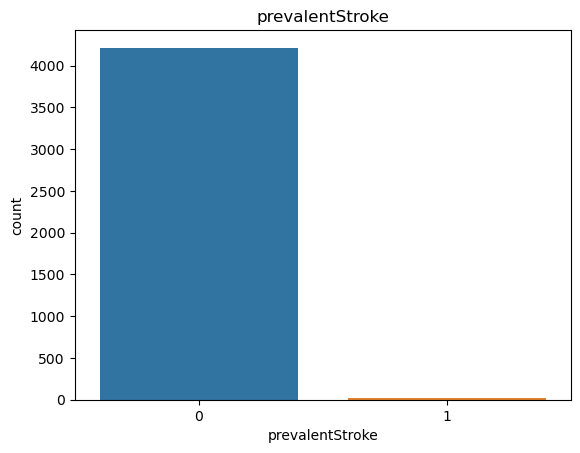

In [21]:
plt.figure()
plt.title('prevalentStroke') 
sns.countplot(x='prevalentStroke',data=df)
plt.show()

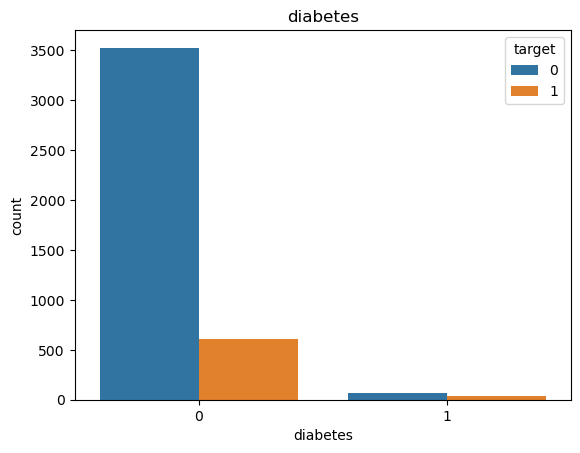

In [22]:
plt.figure() 
plt.title('diabetes')
sns.countplot(x= 'diabetes', data=df, hue="target")
plt.show()

# Plots

In [23]:
df['sysBP'].mean()

132.35240679565834

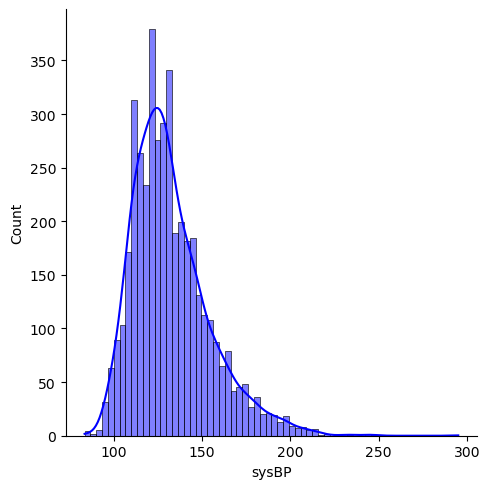

In [24]:
sns.displot (x='sysBP', data=df, kde='True', color='blue') 
plt.show()

Systolic BP is right skewed.

In [25]:
df[ 'diaBP'].mean()

82.89346389806512

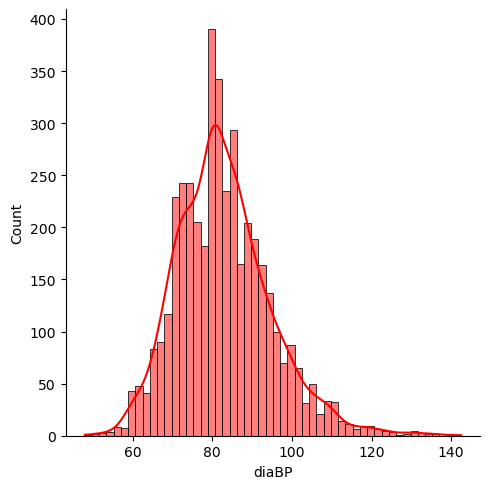

In [26]:
sns.displot(x='diaBP', data=df, kde="True",color='red')
plt.show()

Diastolic BP is normally distributed.

In [27]:
df['totChol'].mean()

236.72158548233045

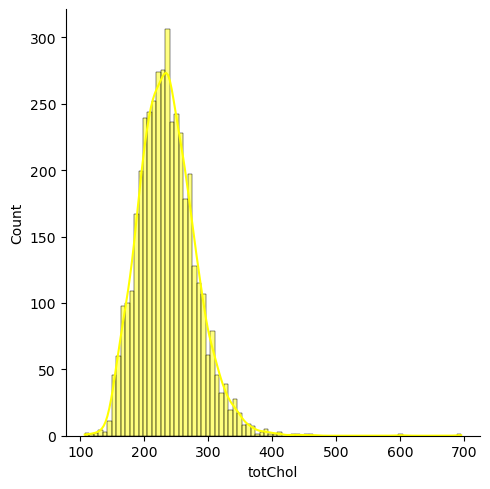

In [28]:
sns.displot(x='totChol', data=df, kde='True', color="yellow")
plt.show()

total choi is right skewed.

In [29]:
df['age'].mean()

49.58494572911751

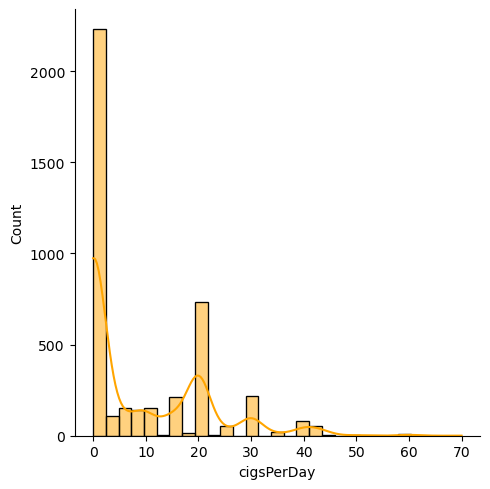

In [30]:
sns.displot(x='cigsPerDay', data=df,kde='True',color="orange")
plt.show()

Cigsperday are not normally distributed.

In [31]:
df ['BMI'].mean()

25.80200758473571

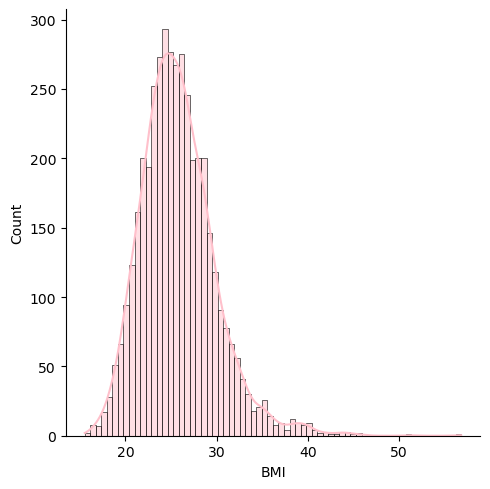

In [32]:
sns.displot (x= 'BMI', data=df, kde="True",color="pink")
plt.show()

BMI is normally distributed.

In [33]:
df['glucose'].mean()


81.96675324675324

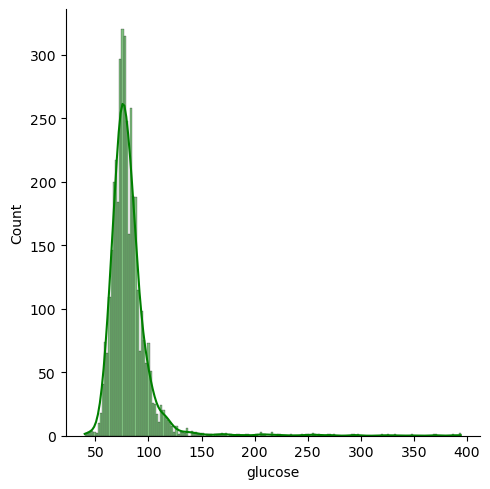

In [34]:
sns.displot(x='glucose',
data=df,kde="True",color='green')
plt.show()

glucose is right skewed.

# Correlation

In [35]:
df.corr()['target'][:-1].sort_values(ascending=False)

age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
Name: target, dtype: float64

<AxesSubplot:>

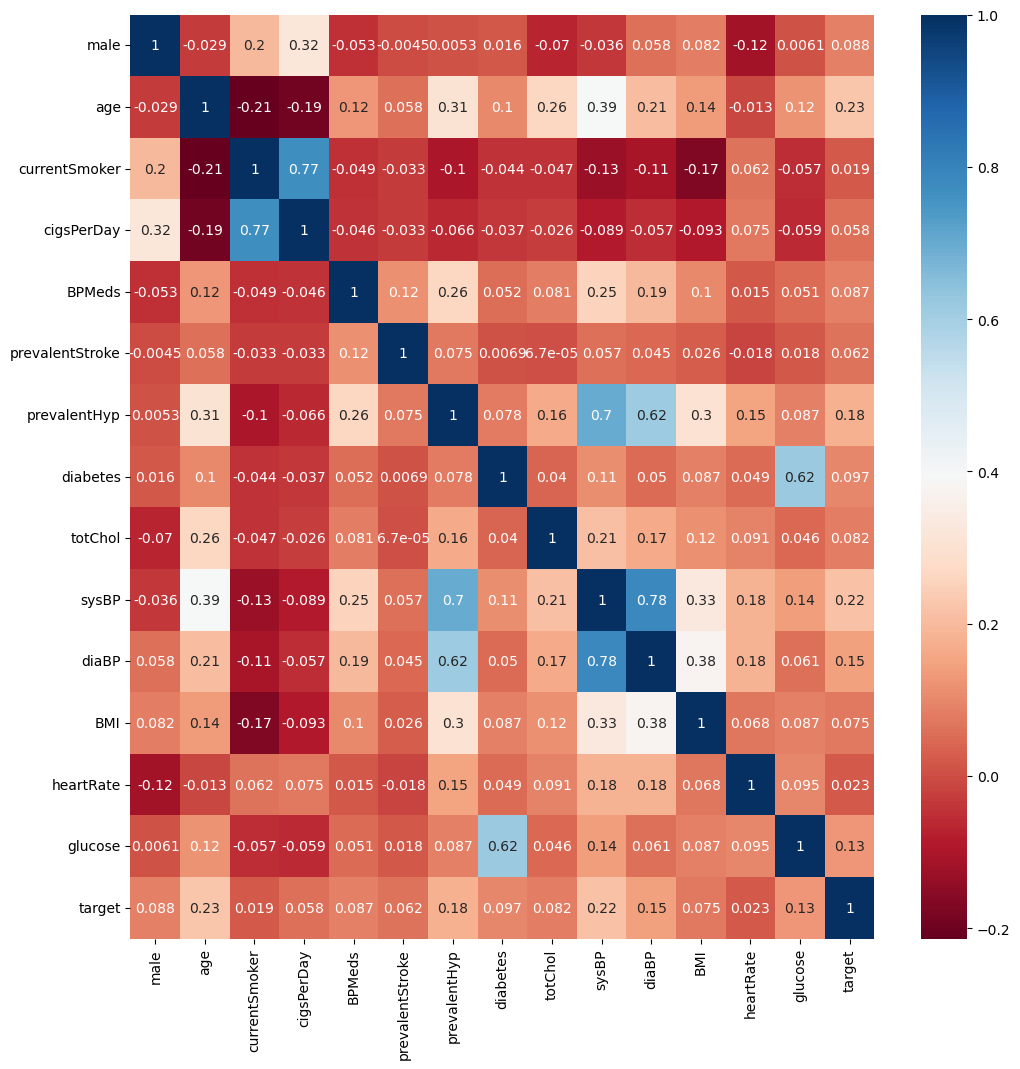

In [36]:
plt.figure(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

In [37]:
# dropping features which are highly correlated 
features_drop = ['currentSmoker', 'diaBP']
df.drop(features_drop, axis=1, inplace=True)

# Handling the missing data

In [38]:
df.isnull().sum()

male                 0
age                  0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64

In [39]:
#filling the null values of glucose attribute from mean value as it is continous,
for i in ['glucose']:
    df[i].fillna(df[i].mean(), inplace=True)
    


In [40]:
df.isnull().sum()

male                0
age                 0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
BMI                19
heartRate           1
glucose             0
target              0
dtype: int64

In [41]:
#as data set is too big as compared to the null values so we can remove these records 


In [42]:
df.dropna (inplace=True) 


In [43]:
df.isnull().sum() 


male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
target             0
dtype: int64

# Tabulate the performance metrics

In [69]:
# create an empty dataframe to store the scores for various classification algorithms 
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'f1-score']) 

# append the result table for all performance scores 
def update_score_card (model_name):
    

# assign 'score_card' as global variable 
    global score_card
    
# append the results to the dataframe 'score_card' 
# 'ignore_index = True' do not consider the index Labels 
    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score (Y_test,Y_pred),
                                    'Recall Score': metrics.recall_score (Y_test, Y_pred),
                                    'Accuracy Score': metrics.accuracy_score (Y_test,Y_pred),
                                    'f1-score': metrics.f1_score (Y_test, Y_pred)}, 
                                   ignore_index = True)

    return(score_card)                                


# Spiltting the data

In [70]:
 df["target"].value_counts() 
#it Looks unbalanced, so we have to make it balanced before model fitting 


0    3477
1     611
Name: target, dtype: int64

In [71]:
X = df.drop('target', axis=1) 
Y = df['target'] 


In [72]:
 #using oversampling 


In [73]:
oversample = RandomOverSampler (sampling_strategy='minority') 
x_res, y_res = oversample.fit_resample (X, Y) 


In [74]:
y_res.value_counts() 
#now it Looks balanced

0    3477
1    3477
Name: target, dtype: int64

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=10) 


In [76]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape 


((5563, 12), (1391, 12), (5563,), (1391,))

# Scaling the data

In [77]:
scaler=StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


# Logistic Regression

In [78]:
lm=LogisticRegression() 
lm.fit(X_train,Y_train) 
print(lm.coef_) 
print(lm.intercept_) 
Y_pred=lm.predict(X_test) 


[[ 0.23741928  0.58455448  0.25397095  0.09012975  0.01957726  0.10187541
   0.03488445  0.0806584   0.30863684  0.04029986 -0.01328026  0.15608323]]
[-0.00531401]


# Evaluation

In [79]:
cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm) 
print("Classification report: ") 
print(classification_report (Y_test,Y_pred)) 
acc1=accuracy_score (Y_test, Y_pred) 
print("Accuracy of the model: ",acc1) 


[[473 212]
 [235 471]]
Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       685
           1       0.69      0.67      0.68       706

    accuracy                           0.68      1391
   macro avg       0.68      0.68      0.68      1391
weighted avg       0.68      0.68      0.68      1391

Accuracy of the model:  0.6786484543493889


In [80]:
update_score_card(model_name = 'Logistic Regression') 


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.689605,0.667139,0.678648,0.678186


# KNN

In [81]:
 #predicting using the KNeighbors_Classifier 
model_KNN=KNeighborsClassifier(n_neighbors=15, 
metric='euclidean') #euclidean,manhattan,minkowski 
model_KNN.fit(X_train,Y_train) 
Y_pred=model_KNN.predict(X_test)


# Evaluation

In [82]:
cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm) 
print("Classification report: ") 
print(classification_report (Y_test,Y_pred)) 
acc2=accuracy_score (Y_test, Y_pred) 
print("Accuracy of the model: ",acc2) 


[[468 217]
 [145 561]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       685
           1       0.72      0.79      0.76       706

    accuracy                           0.74      1391
   macro avg       0.74      0.74      0.74      1391
weighted avg       0.74      0.74      0.74      1391

Accuracy of the model:  0.7397555715312725


In [83]:
update_score_card(model_name = 'KNN') 


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.689605,0.667139,0.678648,0.678186
1,KNN,0.721080,0.794618,0.739756,0.756065


# SVM

In [84]:
svc_model=SVC (kernel='rbf',C=1, gamma=0.1, probability=True) 
svc_model.fit(X_train,Y_train) 
Y_pred=svc_model.predict(X_test) 
# print(list(Y_pred)) 


# Evaluation

In [85]:
cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm) 
print("Classification report: ") 
print(classification_report (Y_test,Y_pred)) 
acc3=accuracy_score(Y_test, Y_pred) 
print("Accuracy of the model: ",acc3) 


[[505 180]
 [207 499]]
Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       685
           1       0.73      0.71      0.72       706

    accuracy                           0.72      1391
   macro avg       0.72      0.72      0.72      1391
weighted avg       0.72      0.72      0.72      1391

Accuracy of the model:  0.7217828900071891


In [86]:
 update_score_card(model_name = 'SVM') 


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.689605,0.667139,0.678648,0.678186
1,KNN,0.721080,0.794618,0.739756,0.756065
2,SVM,0.734904,0.706799,0.721783,0.720578


# Decision Tree

In [87]:
#predicting using the decision_tree_classifier 
model_DecisionTree=DecisionTreeClassifier(criterion='gini',
                                          random_state=10, splitter='best') 
#fit the model on data and predict the values
model_DecisionTree.fit(X_train,Y_train) 
Y_pred=model_DecisionTree.predict(X_test) 


# Evaluation

In [88]:
cfm=confusion_matrix (Y_test,Y_pred) 
print(cfm) 
print("Classification report: ") 
print(classification_report (Y_test, Y_pred)) 
acc4=accuracy_score (Y_test, Y_pred) 
print("Accuracy of the model: ",acc4) 


[[587  98]
 [  2 704]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       685
           1       0.88      1.00      0.93       706

    accuracy                           0.93      1391
   macro avg       0.94      0.93      0.93      1391
weighted avg       0.94      0.93      0.93      1391

Accuracy of the model:  0.9281092739036664


In [89]:
update_score_card (model_name = 'DT') 


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.689605,0.667139,0.678648,0.678186
1,KNN,0.721080,0.794618,0.739756,0.756065
2,SVM,0.734904,0.706799,0.721783,0.720578
3,DT,0.877805,0.997167,0.928109,0.933687


# Random Forest

In [90]:
#predicting using the Random_Forest_classifier 
model_RandomForest=RandomForestClassifier (n_estimators=500,
                                           random_state=10, bootstrap=True, 
                                           n_jobs=-1) 
#fit the model 
model_RandomForest.fit(X_train,Y_train) 
Y_pred=model_RandomForest.predict(X_test) 


# Evaluation

In [91]:
cfm=confusion_matrix (Y_test,Y_pred) 
print(cfm) 
print("Classification report: ") 
print(classification_report (Y_test,Y_pred)) 
acc5=accuracy_score (Y_test, Y_pred) 
print("Accuracy of the model: ",acc5) 


[[653  32]
 [  2 704]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       685
           1       0.96      1.00      0.98       706

    accuracy                           0.98      1391
   macro avg       0.98      0.98      0.98      1391
weighted avg       0.98      0.98      0.98      1391

Accuracy of the model:  0.9755571531272466


In [92]:
# we do some cross validation of RF model beacause of its accuaracy is too high. 


In [93]:
rf=RandomForestClassifier() 
rf.fit(X_train,Y_train.values.ravel()) 
ypred_rf=rf.predict(X_test) 
rf_model=accuracy_score(ypred_rf,Y_test) 
ypred_rf2=rf.predict(X_train) 
rf_model2=accuracy_score(ypred_rf2,Y_train) 
print(f"accuracy for test set :{rf_model:.2f}\naccuracy for train set :{rf_model2:.2f}") 
score3 = cross_val_score (rf, X_train, Y_train, cv = 30) 
print(f"\nafter cross validation the accuracy is {round(score3.mean(),2)}") 


accuracy for test set :0.97
accuracy for train set :1.00

after cross validation the accuracy is 0.97


In [94]:
update_score_card (model_name = 'RF') 


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.689605,0.667139,0.678648,0.678186
1,KNN,0.721080,0.794618,0.739756,0.756065
2,SVM,0.734904,0.706799,0.721783,0.720578
3,DT,0.877805,0.997167,0.928109,0.933687
4,RF,0.956522,0.997167,0.975557,0.976422


# Gredient Boosting Classifier

In [95]:
#predicting using the 
model_EXT=GradientBoostingClassifier(n_estimators=900,
                                     random_state=10)
#fit the model 
model_EXT.fit(X_train,Y_train) 
                                     
Y_pred=model_EXT.predict(X_test) 


# Evaluation

In [96]:
cfm=confusion_matrix(Y_test,Y_pred) 
print(cfm) 
print("Classification report: ") 
print(classification_report (Y_test,Y_pred)) 
acc6=accuracy_score (Y_test, Y_pred) 
print( "Accuracy of the model: ",acc6) 


[[557 128]
 [ 42 664]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       685
           1       0.84      0.94      0.89       706

    accuracy                           0.88      1391
   macro avg       0.88      0.88      0.88      1391
weighted avg       0.88      0.88      0.88      1391

Accuracy of the model:  0.8777857656362329


In [97]:
update_score_card (model_name = 'GBC')

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.689605,0.667139,0.678648,0.678186
1,KNN,0.721080,0.794618,0.739756,0.756065
2,SVM,0.734904,0.706799,0.721783,0.720578
3,DT,0.877805,0.997167,0.928109,0.933687
4,RF,0.956522,0.997167,0.975557,0.976422
5,GBC,0.838384,0.940510,0.877786,0.886515
